# K-means 算法实例
k-均值算法：以空间中k个点为中心进行聚类，对最靠近他们的对象归类

算法：
- 数据点与各簇中心点的距离： dist(x_i,u_j^t )
- 根据距离归类  X(i) 数据那个最近的u
- 更新中心点 中心点为新的x点的中心
- 再循环，直到不再变化


算法流程：
	1. 选择聚类的个数
	2. 确定聚类中心
	3. 根据点到聚类中心确定各个点的类别归属
	4. 根据各个类别数据更新聚类中心
	5. 重复以上步骤直到收敛

优点：
	1. 原理简单，实现容易，收敛速度块
	2. 参数少，方便使用

缺点：
	1. 必须设置簇的数量
随机选择初始聚类中心，结果会出现不一致

## Load the data

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv('./data/K_means/K_means_data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [2]:
# define x,y
x = data.drop(['labels'], axis= 1)
y = data.loc[:,'labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [30]:
pd.Series(y).value_counts()

labels
2    1156
1     954
0     890
Name: count, dtype: int64

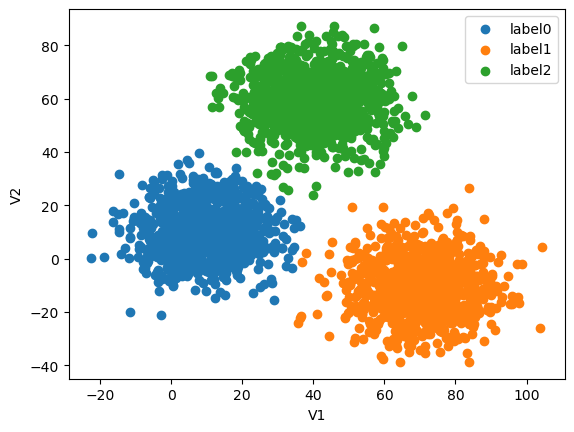

In [4]:
#visualize the data
%matplotlib inline
from matplotlib import pyplot as plt
x1 = x.loc[:,'V1']
x2 = x.loc[:,'V2']
fig1 = plt.figure()
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [5]:
# set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3, random_state=0)
KM.fit(x)

,"n_clusters n_clusters: int, default=8The number of clusters to form as well as the number ofcentroids to generate.For an example of how to choose an optimal value for `n_clusters` refer to:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.",3
,"init init: {'k-means++', 'random'}, callable or array-like of shape (n_clusters, n_features), default='k-means++'Method for initialization:* 'k-means++' : selects initial cluster centroids using sampling based on an empirical probability distribution of the points' contribution to the overall inertia. This technique speeds up convergence. The algorithm implemented is ""greedy k-means++"". It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.* 'random': choose `n_clusters` observations (rows) at random from data for the initial centroids.* If an array is passed, it should be of shape (n_clusters, n_features) and gives the initial centers.* If a callable is passed, it should take arguments X, n_clusters and a random state and return an initialization.For an example of how to use the different `init` strategies, see:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_digits.py`.For an evaluation of the impact of initialization, see the example:ref:`sphx_glr_auto_examples_cluster_plot_kmeans_stability_low_dim_dense.py`.",'k-means++'
,"n_init n_init: 'auto' or int, default='auto'Number of times the k-means algorithm is run with different centroidseeds. The final results is the best output of `n_init` consecutive runsin terms of inertia. Several runs are recommended for sparsehigh-dimensional problems (see :ref:`kmeans_sparse_high_dim`).When `n_init='auto'`, the number of runs depends on the value of init:10 if using `init='random'` or `init` is a callable;1 if using `init='k-means++'` or `init` is an array-like... versionadded:: 1.2 Added 'auto' option for `n_init`... versionchanged:: 1.4 Default value for `n_init` changed to `'auto'`.",'auto'
,"max_iter max_iter: int, default=300Maximum number of iterations of the k-means algorithm for asingle run.",300
,"tol tol: float, default=1e-4Relative tolerance with regards to Frobenius norm of the differencein the cluster centers of two consecutive iterations to declareconvergence.",0.0001
,"verbose verbose: int, default=0Verbosity mode.",0
,"random_state random_state: int, RandomState instance or None, default=NoneDetermines random number generation for centroid initialization. Usean int to make the randomness deterministic.See :term:`Glossary `.",0
,"copy_x copy_x: bool, default=TrueWhen pre-computing distances it is more numerically accurate to centerthe data first. If copy_x is True (default), then the original data isnot modified. If False, the original data is modified, and put backbefore the function returns, but small numerical differences may beintroduced by subtracting and then adding the data mean. Note that ifthe original data is not C-contiguous, a copy will be made even ifcopy_x is False. If the original data is sparse, but not in CSR format,a copy will be made even if copy_x is False.",True
,"algorithm algorithm: {""lloyd"", ""elkan""}, default=""lloyd""K-means algorithm to use. The classical EM-style algorithm is `""lloyd""`.The `""elkan""` variation can be more efficient on some datasets withwell-defined clusters, by using the triangle inequality. However it'smore memory intensive due to the allocation of an extra array of shape`(n_samples, n_clusters)`... versionchanged:: 0.18 Added Elkan algorithm.. versionchanged:: 1.1 Renamed ""full"" to ""lloyd"", and deprecated ""auto"" and ""full"". Changed ""auto"" to use ""lloyd"" instead of ""elkan"".",'lloyd'


In [6]:
centers = KM.cluster_centers_

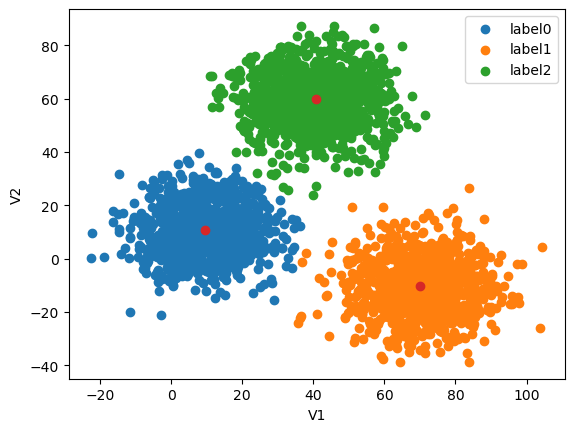

In [7]:
# draw the cluster centers
fig2 = plt.figure()

label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [32]:
# predict V1=80,V2=60
x_pred = pd.DataFrame([[80,60]], columns=["V1", "V2"])  # 与 X_train 列名一致
y_predict_test = KM.predict(x_pred)
print(y_predict_test)

[0]


In [33]:
# predict based on the trainning data
y_predict = KM.predict(x)
print(pd.Series(y_predict).value_counts(), pd.Series(y).value_counts())

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


In [10]:
# count the accuray
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_predict)
print(accuracy)

0.31966666666666665


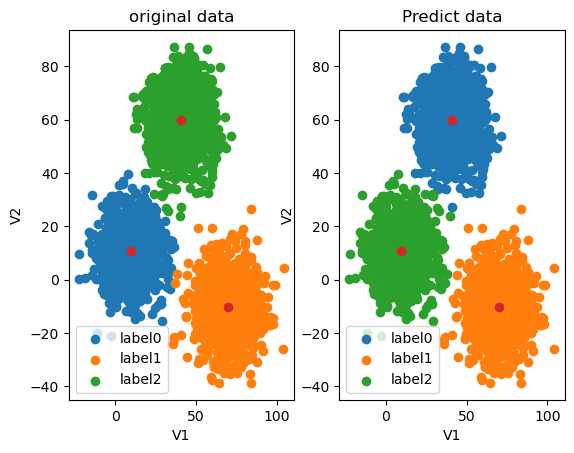

In [11]:
# visualize the data
fig3 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig4 = plt.subplot(122)
label0 = plt.scatter(x1[y_predict==0],x2[y_predict==0])
label1 = plt.scatter(x1[y_predict==1],x2[y_predict==1])
label2 = plt.scatter(x1[y_predict==2],x2[y_predict==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [12]:
# change y_predict's number
y_revised = []
for i in y_predict:
    if i==0:
        y_revised.append(2)
    elif i==1:
        y_revised.append(1)
    else:
        y_revised.append(0)
#print(y_revised)
y_revised = np.array(y_revised)  

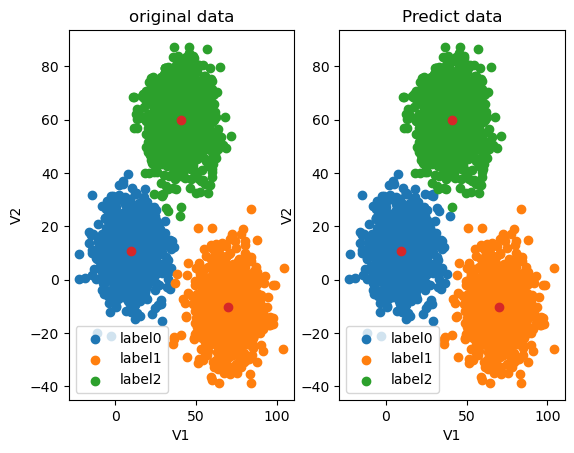

In [13]:
#redraw the y
fig5 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig6 = plt.subplot(122)
label0 = plt.scatter(x1[y_revised==0],x2[y_revised==0])
label1 = plt.scatter(x1[y_revised==1],x2[y_revised==1])
label2 = plt.scatter(x1[y_revised==2],x2[y_revised==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [14]:
# test the accurancy
accurancy = accuracy_score(y,y_revised)
print(accurancy)

0.997


# KNN 算法实例

In [15]:
# establish the KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN =  KNeighborsClassifier(n_neighbors=3)
KNN.fit(x,y)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [34]:
# predict based on the test data (80,60)
x_pred_knn = pd.DataFrame([[80,60]], columns=["V1", "V2"])
y_predict_knn_test = KNN.predict(x_pred_knn)
y_predict_cnn = KNN.predict(x)
knn_accurancy = accuracy_score(y,y_predict_cnn)
print(knn_accurancy)

1.0


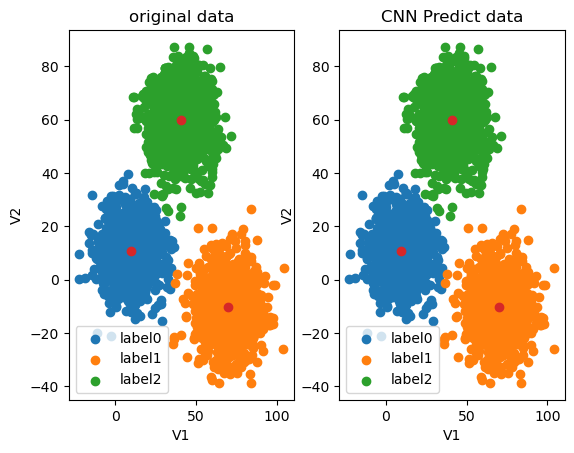

In [17]:
fig7 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig8 = plt.subplot(122)
label0 = plt.scatter(x1[y_predict_cnn==0],x2[y_predict_cnn==0])
label1 = plt.scatter(x1[y_predict_cnn==1],x2[y_predict_cnn==1])
label2 = plt.scatter(x1[y_predict_cnn==2],x2[y_predict_cnn==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('CNN Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [18]:
# establis the meanshift model
from sklearn.cluster import MeanShift, estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(x,n_samples=500)
#establish the model
MS = MeanShift(bandwidth=bw)
MS.fit(x)


,"bandwidth bandwidth: float, default=NoneBandwidth used in the flat kernel.If not given, the bandwidth is estimated usingsklearn.cluster.estimate_bandwidth; see the documentation for thatfunction for hints on scalability (see also the Notes, below).",np.float64(30.846634548202154)
,"seeds seeds: array-like of shape (n_samples, n_features), default=NoneSeeds used to initialize kernels. If not set,the seeds are calculated by clustering.get_bin_seedswith bandwidth as the grid size and default values forother parameters.",None
,"bin_seeding bin_seeding: bool, default=FalseIf true, initial kernel locations are not locations of allpoints, but rather the location of the discretized version ofpoints, where points are binned onto a grid whose coarsenesscorresponds to the bandwidth. Setting this option to True will speedup the algorithm because fewer seeds will be initialized.The default value is False.Ignored if seeds argument is not None.",False
,"min_bin_freq min_bin_freq: int, default=1To speed up the algorithm, accept only those bins with at leastmin_bin_freq points as seeds.",1
,"cluster_all cluster_all: bool, default=TrueIf true, then all points are clustered, even those orphans that arenot within any kernel. Orphans are assigned to the nearest kernel.If false, then orphans are given cluster label -1.",True
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. The following tasks benefitfrom the parallelization:- The search of nearest neighbors for bandwidth estimation and label assignments. See the details in the docstring of the ``NearestNeighbors`` class.- Hill-climbing optimization for all seeds.See :term:`Glossary ` for more details.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.",None
,"max_iter max_iter: int, default=300Maximum number of iterations, per seed point before the clusteringoperation terminates (for that seed point), if has not converged yet... versionadded:: 0.22",300


In [25]:
y_predict_ms = MS.predict(x)
print(pd.Series(y_predict_ms).value_counts(), pd.Series(y).value_counts())

0    1149
1     952
2     899
Name: count, dtype: int64 labels
2    1156
1     954
0     890
Name: count, dtype: int64


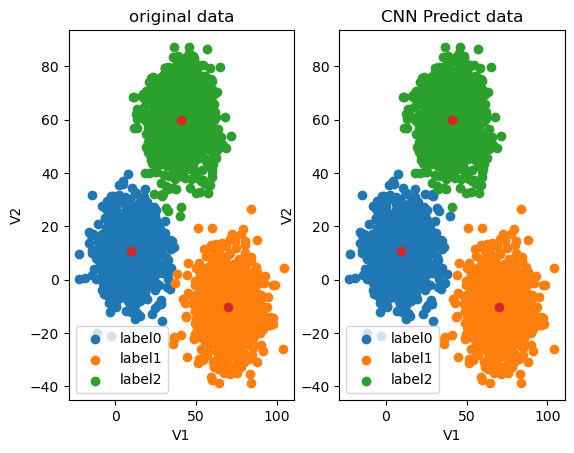

In [20]:
# visulize the result
y_revised_ms = []
for i in y_predict_ms:
    if i==0:
        y_revised_ms.append(2)
    elif i==1:
        y_revised_ms.append(1)
    else:
        y_revised_ms.append(0)
#print(y_revised)
y_revised_ms = np.array(y_revised_ms) 
fig9 = plt.subplot(121)
label0 = plt.scatter(x1[y==0],x2[y==0])
label1 = plt.scatter(x1[y==1],x2[y==1])
label2 = plt.scatter(x1[y==2],x2[y==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('original data')
plt.legend((label0, label1, label2),('label0','label1','label2'))

fig10 = plt.subplot(122)
label0 = plt.scatter(x1[y_revised_ms==0],x2[y_revised_ms==0])
label1 = plt.scatter(x1[y_revised_ms==1],x2[y_revised_ms==1])
label2 = plt.scatter(x1[y_revised_ms==2],x2[y_revised_ms==2])
plt.scatter(centers[:,0],centers[:,1])
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('CNN Predict data')
plt.legend((label0, label1, label2),('label0','label1','label2'))
plt.show()

In [21]:
accuracy_ms = accuracy_score(y,y_revised_ms)
print(accuracy_ms)

0.997
